# Task 01 - Teoría

### 1. En un juego de suma cero para dos jugadores, ¿cómo funciona el algoritmo minimax para determinar la estrategia óptima para cada jugador? ¿Puede explicarnos el concepto de "valor minimax" y su importancia en este contexto?


El algoritmo minimax es una técnica para juegos de dos jugadores de suma cero donde uno intenta maximizar su ganancia y el otro minimizarla. Calcula el "valor minimax" para cada estado del juego, representando la ganancia esperada si ambos jugadores juegan óptimamente desde ese estado. Cada jugador elige movimientos que maximicen o minimicen este valor respectivamente. Es importante porque proporciona una guía para tomar decisiones informadas en el juego, maximizando las posibilidades de ganar o minimizando las de perder.

Fuente: https://www.cs.us.es/~fsancho/Blog/posts/Minimax.md

### 2. Compare y contraste el algoritmo minimax con la poda alfa-beta. ¿Cómo mejora la poda alfa-beta la eficiencia del algoritmo minimax, particularmente en árboles de caza grandes? Proporcione un ejemplo para ilustrar la diferencia en la complejidad computacional entre la poda minimax y alfa-beta.

El algoritmo minimax es un algoritmo de toma de desiciones usado en teoria de juego e inteligencia artificial para encontrar el mejor movimiento para un jugador en una situación en la que el otro jugador está jugando óptimamente. El algoritmo es típicamente usado para juegos de dos jugadores, como ajedrez, tic-tac-toe y Go. 

La poda alfa-beta es una técnica usada para mejorar la eficiencia del algoritmo minimax para una IA jugando un juego. Está basada en la observación de muchas "pasadas" o juegos anteriores, en los que algunas ramas del arbol de juego pueden ser ignoradas porque está garantizado que los movimiento son peores que otros. 

Observemos el siguiente ejemplo:

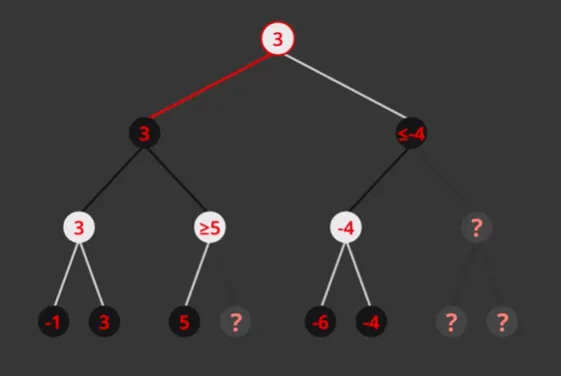

**¿Por qué la cuarta hoja no está siendo considerada para el alfa-beta prunning?**

- Evaluamos las primeras 2 hojas para la primera rama (-1, 3, 5). El primer máximo es 3. 
- Ya que el segundo es 5, sabemos que el segundo máximo debe ser al menos mayor o igual a 5. 
- Ya que el primer mínimo arriba escoge el menor de los dos máximos, sabemos que el mínimo eligirá 3. 
- Entonces, no importa cual sea la 4ta hoja, ya que el valor no será considerado de nuevo. 

**¿Por que el último máximo y las últimas dos hojas no son considerados?**

- Lo siguiente que debemos hacer es encontrar los valores de las siguientes dos hojas (-6, -4). El máximo entonces es -4. 
- Entonces, el mínimo mas arriba tiene la opción de elegir el valor de -4, por lo que sabemos que menor o igual a -4. 
- Entonces, el máximo final (nodo inicial o raíz) eligirá 3. 
- El máximo final y las últimas dos hojas no importan porque nunca serán consideradas para el arbol. 

Respondiendo la pregunta inicial, en el caso de minmax, todos los nodos deben ser considerados, aumentando la complejidad computacional. Al usar alfa-beta prunning, no todos los nodos son considerados por lo que la complejidad disminuye, haciendolo más eficiente. 

#### Referencias
Brennan, A. (2023, January 20). Minimax algorithm and alpha-beta pruning. Medium. https://medium.com/@aaronbrennan.brennan/minimax-algorithm-and-alpha-beta-pruning-646beb01566c 

### 3. ¿Cuál es el papel de expectiminimax en juegos con incertidumbre, como aquellos que involucran nodos de azar o información oculta? ¿En qué se diferencia el expectiminimax del minimax en el manejo de resultados probabilísticos y cuáles son los desafíos clave que aborda?

El expectiminimax es una extensión del algoritmo minimax para juegos con incertidumbre. A diferencia del minimax, considera eventos aleatorios y calcula el valor esperado para cada movimiento, teniendo en cuenta todas las posibles jugadas del oponente y los resultados aleatorios. Su objetivo es encontrar la estrategia óptima que maximice la ganancia esperada, dado que el futuro no está completamente determinado. Esto lo hace adecuado para manejar la incertidumbre en los juegos y proporcionar estrategias óptimas en esas condiciones.

Fuente: https://academia-lab.com/enciclopedia/expectiminimax/

# Task 02 - Connect Four

In [1]:
import numpy as np
import math
import random

In [2]:
# Constantes del juego

# Define el tamaño del tablero
CANT_FILAS = 6
CANT_COLUMNAS = 7

# Define el indice de los jugadores
JUGADOR = 0 
IA = 1

# Define las piezas de los jugadores
PIEZA_JUGADOR = 1
PIEZA_IA = 2

In [4]:
# Crea el tablero utilizando una matriz de 0s
def crearTablero():
    tablero = np.zeros((CANT_FILAS, CANT_COLUMNAS), dtype=int)
    return tablero

# Inserta la ficha en el tablero
def soltarFicha(tablero, fila, columna, pieza):
    tablero[fila][columna] = pieza

# Chequea si la columna es valida para soltar la ficha
def esValida(tablero, columna):
    return tablero[CANT_FILAS-1][columna] == 0

# Obtiene la siguiente fila vacia en la columna
def obtenerSiguienteFilaVacia(tablero, columna):
    for r in range(CANT_FILAS):
        if tablero[r][columna] == 0:
            return r

# Imprime el tablero
def imprimirTablero(tablero):
    tableroInvertido = np.flip(tablero, 0)
    filas, columnas = tableroInvertido.shape

    tableroInvertido = tableroInvertido.astype(int)

    for i in range(filas):
        print("|", end="")
        for j in range(columnas):
            print(f"{tableroInvertido[i,j]:2}", end=" |")
        print()
    
    print("-" * (columnas * 4))

    print("|", end=" ")
    for j in range(columnas):
        print(f"{j}", end=" | ")

# Chequea si alguien gano
def movimientoGanador(tablero, pieza):
    # Chequeo horizontal
    for i in range(CANT_COLUMNAS - 3):
        for j in range(CANT_FILAS):
            if tablero[j][i] == pieza and tablero[j][i+1] == pieza and tablero[j][i+2] == pieza and tablero[j][i+3] == pieza:
                return True
    
    # Chequeo vertical
    for i in range(CANT_COLUMNAS):
        for j in range(CANT_FILAS - 3):
            if tablero[j][i] == pieza and tablero[j+1][i] == pieza and tablero[j+2][i] == pieza and tablero[j+3][i] == pieza:
                return True
    
    # Chequeo diagonal positiva
    for i in range(CANT_COLUMNAS - 3):
        for j in range(CANT_FILAS - 3):
            if tablero[j][i] == pieza and tablero[j+1][i+1] == pieza and tablero[j+2][i+2] == pieza and tablero[j+3][i+3] == pieza:
                return True
    
    # Chequeo diagonal negativa
    for i in range(CANT_COLUMNAS - 3):
        for j in range(3, CANT_FILAS):
            if tablero[j][i] == pieza and tablero[j-1][i+1] == pieza and tablero[j-2][i+2] == pieza and tablero[j-3][i+3] == pieza:
                return True

    return False

# Obtiene una lista con las posiciones validas para soltar la ficha
def obtenerPosicionesValidas(tablero):
    posicionesValidas = []
    for i in range(CANT_COLUMNAS):
        if esValida(tablero, i):
            posicionesValidas.append(i)
    return posicionesValidas


In [5]:
class AGENTE_IA:
    def __init__(self, alfa_beta_poda):
        self.alfa_beta_poda = alfa_beta_poda
    
    def puntajePosicion(self, tablero, pieza):
        puntaje = 0
        piezaOponente = PIEZA_JUGADOR

        tableroDeEvaluacion = np.array([[3, 4, 5, 7, 5, 4, 3],
                                        [4, 6, 8, 10, 8, 6, 4],
                                        [5, 8, 11, 13, 11, 8, 5],
                                        [5, 8, 11, 13, 11, 8, 5],
                                        [4, 6, 8, 10, 8, 6, 4],
                                        [3, 4, 5, 7, 5, 4, 3]])
        
        puntajePieza = np.sum(tableroDeEvaluacion[tablero == pieza])
        puntajeOponente = np.sum(tableroDeEvaluacion[tablero == piezaOponente])
        
        puntaje = puntajePieza - puntajeOponente
        return puntaje

    def isTerminalNode(self, tablero):
        return movimientoGanador(tablero, PIEZA_JUGADOR) or movimientoGanador(tablero, PIEZA_IA) or len(obtenerPosicionesValidas(tablero)) == 0

    def minimax(self, tablero, maximizandoJugador, profundidad, alfa = None, beta = None):
        lugaresValidos = obtenerPosicionesValidas(tablero)
        esTerminal = self.isTerminalNode(tablero)
        
        if profundidad == 0 or esTerminal:
            if esTerminal:
                if movimientoGanador(tablero, PIEZA_IA):
                    return (None, math.inf)
                elif movimientoGanador(tablero, PIEZA_JUGADOR):
                    return (None, -math.inf)
                else:
                    return (None, 0)
            else:
                return (None, self.puntajePosicion(tablero, PIEZA_IA))
            
        if maximizandoJugador:
            valor = -math.inf
            columna = random.choice(lugaresValidos)
            for col in lugaresValidos:
                fila = obtenerSiguienteFilaVacia(tablero, col)
                tableroTemporal = tablero.copy()
                soltarFicha(tableroTemporal, fila, col, PIEZA_IA)
                nuevoValor = self.minimax(tableroTemporal, False, profundidad - 1, alfa, beta)[1]
                
                if nuevoValor > valor:
                    valor = nuevoValor
                    columna = col
                if self.alfa_beta_poda:  # Solo actualiza alfa y beta si alfa_beta_poda es True
                    alfa = max(alfa, valor)
                    if alfa >= beta:
                        break
            return columna, valor
        
        else:
            value = math.inf
            columna = random.choice(lugaresValidos)
            for col in lugaresValidos:
                fila = obtenerSiguienteFilaVacia(tablero, col)
                tableroTemporal = tablero.copy()
                soltarFicha(tableroTemporal, fila, col, PIEZA_JUGADOR)
                nuevoValor = self.minimax(tableroTemporal, True, profundidad - 1, alfa, beta)[1]
                
                if nuevoValor < value:
                    value = nuevoValor
                    columna = col
                if self.alfa_beta_poda:  # Solo actualiza alfa y beta si alfa_beta_poda es True
                    beta = min(beta, value)
                    if alfa >= beta:
                        break
            return columna, value

# IA vs IA

In [5]:
juegosGanados = [0, 0]

for i in range(10):
    # creamos el tablero
    tablero = crearTablero()

    # Inicializamos las variables del juego
    juegoTerminado = False
    turno = random.randint(JUGADOR, IA)
    jugadorHumano = False

    podaAlfaBetaIA01 = False
    profundidadIA1 = 2
    agente01 = AGENTE_IA(podaAlfaBetaIA01)

    podaAlfaBetaIA02 = True
    profundidadIA2 = 5
    agente02 = AGENTE_IA(podaAlfaBetaIA02)



    # Imprimimos el tablero
    imprimirTablero(tablero)
    print("\n")
    print(f"Juego {i+1}")
    
    while not juegoTerminado:
        if turno == JUGADOR:
            # Turno del jugador
            if jugadorHumano:
                print("---> Turno del Jugador <---")
                columna = int(input("Elije una columna (0-6): "))
                
                if esValida(tablero, columna):
                    fila = obtenerSiguienteFilaVacia(tablero, columna)
                    soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                    if movimientoGanador(tablero, PIEZA_JUGADOR):
                        print("Ganaste!")
                        juegoTerminado = True
                        imprimirTablero(tablero)
                        break
                
                imprimirTablero(tablero)
                print("\n") 
                turno += 1
                turno = turno % 2

            else:
                print("---> Turno de la IA-01 <---")
                columna, puntaje = agente01.minimax(tablero, True, profundidadIA1, -math.inf, math.inf)
                if esValida(tablero, columna):
                    fila = obtenerSiguienteFilaVacia(tablero, columna)
                    soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                    if movimientoGanador(tablero, PIEZA_JUGADOR):
                        print("Ganó la IA - 01!")
                        juegosGanados[0] = juegosGanados[0] + 1
                        juegoTerminado = True
                        imprimirTablero(tablero)
                        break
                    
                imprimirTablero(tablero)
                print("\n")
                turno += 1
                turno = turno % 2
                    
        else:
            # Turno de la IA
            print("---> Turno de la IA <---")
            columna, puntaje = agente02.minimax(tablero, True, profundidadIA2, -math.inf, math.inf)
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_IA)
                if movimientoGanador(tablero, PIEZA_IA):
                    print("Ganó la IA - 02!")
                    juegosGanados[1] = juegosGanados[1] + 1
                    juegoTerminado = True
                    imprimirTablero(tablero)
                    break
                
            imprimirTablero(tablero)
            print("\n")
            turno += 1
            turno = turno % 2
                
        
        if agente01.isTerminalNode(tablero) and agente02.isTerminalNode(tablero):
            print("Empate!")
            print("\n")
            imprimirTablero(tablero)
            juegoTerminado = True
            
print(juegosGanados)


| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

Juego 1
---> Turno de la IA <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno de la IA-01 <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno de la IA <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 2 | 0 | 0 | 0 |
-----------

# Humanos vs IA

In [11]:
# creamos el tablero
tablero = crearTablero()

# Inicializamos las variables del juego
juegoTerminado = False
turno = random.randint(JUGADOR, IA)
jugadorHumano = True

podaAlfaBetaIA01 = False
profundidadIA1 = 2
agente01 = AGENTE_IA(podaAlfaBetaIA01)

podaAlfaBetaIA02 = True
profundidadIA2 = 5
agente02 = AGENTE_IA(podaAlfaBetaIA02)



# Imprimimos el tablero
imprimirTablero(tablero)
print("\n")

while not juegoTerminado:
    if turno == JUGADOR:
        # Turno del jugador
        if jugadorHumano:
            print("---> Turno del Jugador <---")
            columna = int(input("Elije una columna (0-6): "))
            
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                if movimientoGanador(tablero, PIEZA_JUGADOR):
                    print("Ganaste!")
                    juegoTerminado = True
                    imprimirTablero(tablero)
                    break
            
            imprimirTablero(tablero)
            print("\n") 
            turno += 1
            turno = turno % 2

        else:
            print("---> Turno de la IA-01 <---")
            columna, puntaje = agente01.minimax(tablero, True, profundidadIA1, -math.inf, math.inf)
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                if movimientoGanador(tablero, PIEZA_JUGADOR):
                    print("Ganó la IA - 01!")
                    juegoTerminado = True
                    imprimirTablero(tablero)
                    break
                
            imprimirTablero(tablero)
            print("\n")
            turno += 1
            turno = turno % 2
                
    else:
        # Turno de la IA
        print("---> Turno de la IA <---")
        columna, puntaje = agente02.minimax(tablero, True, profundidadIA2, -math.inf, math.inf)
        if esValida(tablero, columna):
            fila = obtenerSiguienteFilaVacia(tablero, columna)
            soltarFicha(tablero, fila, columna, PIEZA_IA)
            if movimientoGanador(tablero, PIEZA_IA):
                print("Ganó la IA - 02!")
                juegoTerminado = True
                imprimirTablero(tablero)
                break
            
        imprimirTablero(tablero)
        print("\n")
        turno += 1
        turno = turno % 2
            
    
    if agente01.isTerminalNode(tablero) and agente02.isTerminalNode(tablero):
        print("Empate!")
        print("\n")
        imprimirTablero(tablero)
        juegoTerminado = True
            


| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno de la IA <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno del Jugador <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 1 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno de la IA <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 1 | 0 | 0 | 0 | 0 |
-------------------

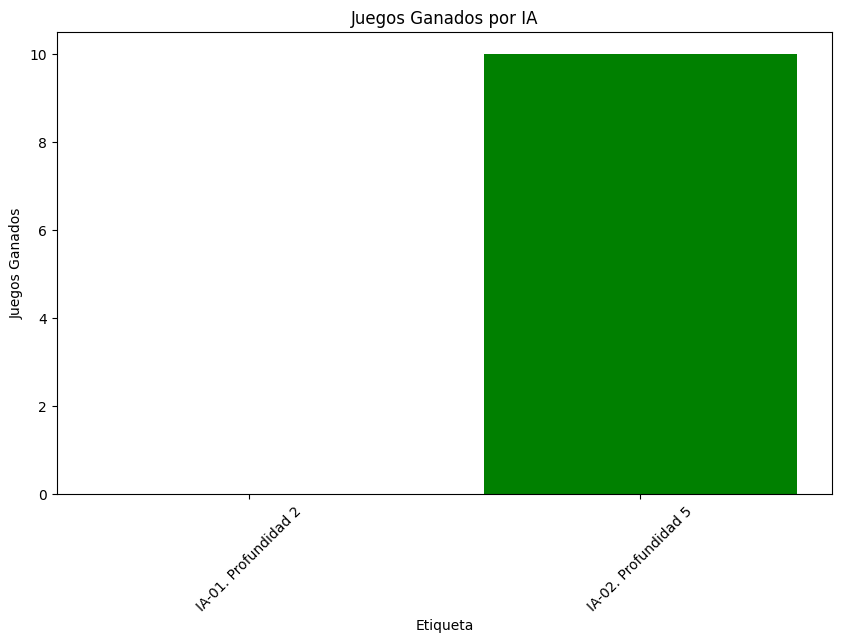

In [ ]:
import matplotlib.pyplot as plt

etiquetas = [f'IA-01. Profundidad {profundidadIA1}', f'IA-02. Profundidad {profundidadIA2}']

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Tamaño opcional
plt.bar(etiquetas, juegosGanados, color=['blue', 'green'])  # Crear gráfico de barras con colores

plt.xlabel('Etiqueta')  # Etiqueta del eje X
plt.ylabel('Juegos Ganados')  # Etiqueta del eje Y
plt.title('Juegos Ganados por IA')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor lectura

# Guardar la gráfica en un archivo
plt.savefig('juegos_ganados_por_ia.png', bbox_inches='tight')  # Guardar la imagen, ajustar el layout

# Mostrar la gráfica
plt.show()

# Referencias
### Codigo para la evaluacion de ganadores
https://www.youtube.com/watch?v=rbmk1qtVEmg
### Obtencion de la matriz de valores inicial
Chat Copilot - prompt:

        evaluation_board = np.array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])
        Como asi?

Respuesta:

En el juego de Connect 4 (Conecta 4), las posiciones centrales suelen ser más valiosas porque ofrecen más oportunidades para conectar cuatro fichas. Por lo tanto, podríamos asignar valores más altos a las posiciones centrales y valores más bajos a las posiciones de los bordes. Aquí hay un ejemplo de cómo podrías hacerlo:

En este tablero de evaluación, las posiciones con valores más altos son más deseables para el jugador. Por supuesto, estos valores son solo sugerencias y podrías ajustarlos según tu estrategia de juego.

    evaluation_board = np.array([[3, 4, 5, 7, 5, 4, 3],
                             [4, 6, 8, 10, 8, 6, 4],
                             [5, 8, 11, 13, 11, 8, 5],
                             [5, 8, 11, 13, 11, 8, 5],
                             [4, 6, 8, 10, 8, 6, 4],
                             [3, 4, 5, 7, 5, 4, 3]])

# Link del video
https://youtu.be/GIugZYrOxII
# Link del Repo
https://github.com/angelcast2002/Lab06-IA.git